In [13]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing the dataset
data=keras.datasets.mnist

In [15]:
data

<module 'keras.api.datasets.mnist' from 'C:\\Users\\Lenovo\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [16]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

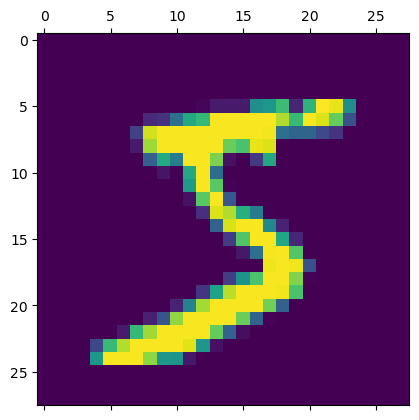

In [19]:
plt.matshow(x_train[0])

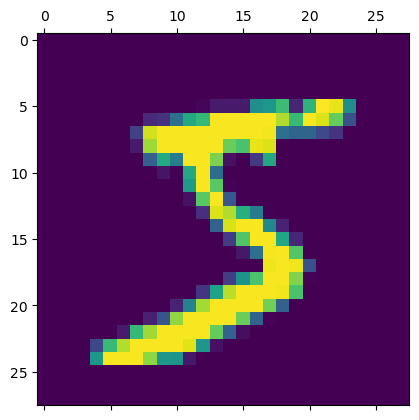

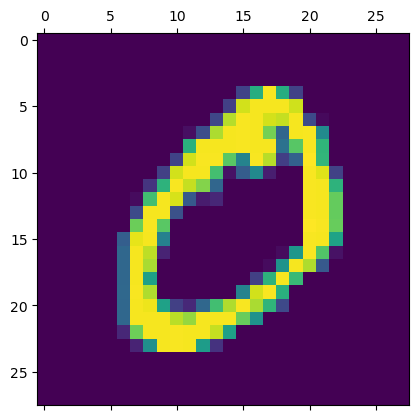

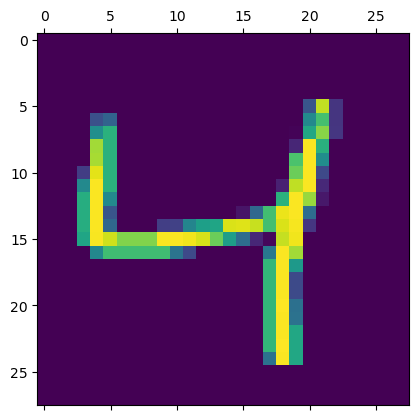

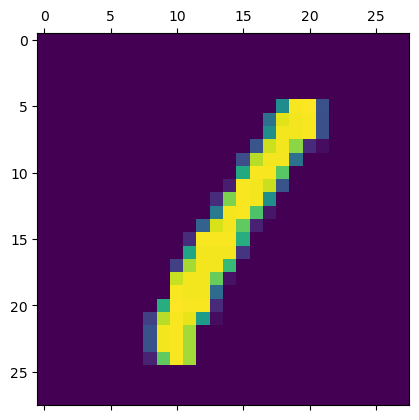

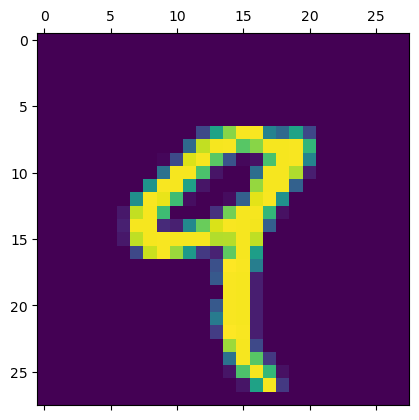

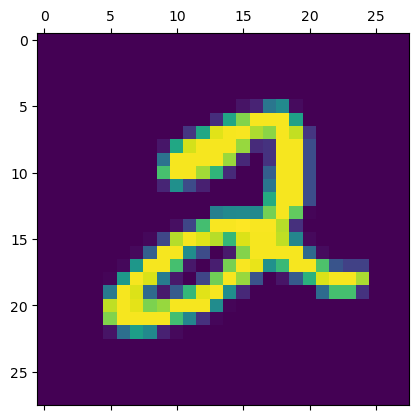

In [20]:
for i in range(6):
    plt.matshow(x_train[i])

In [21]:
y_train[:10] #above digits

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [22]:
#flattening the x_train and x_test
flat_x_train=x_train.reshape(len(x_train),28*28)
flat_x_test=x_test.reshape(len(x_test),28*28)

In [27]:
flat_x_train.shape #6000-images 784-elements

(60000, 784)

In [ ]:
keras sequential units(Neurons):
https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc
Activation:https://keras.io/api/layers/activations/
compilatin:https://www.tutorialspoint.com/keras/keras_model_compilation.htm

In [41]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # Define input shape here
    keras.layers.Dense(units=10, activation='sigmoid')  # No need for input_shape here
])

model.compile(
    optimizer='adam',  # 'Adam' can be lowercase
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.fit(flat_x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2948 - loss: 16.7760
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2970 - loss: 6.3035
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3028 - loss: 5.2924
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2915 - loss: 5.2820
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2887 - loss: 5.2774


In [51]:
model.evaluate(flat_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2920 - loss: 6.2807


[5.6521077156066895, 0.30140000581741333]

In [53]:
y_pred=model.predict(flat_x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step


In [55]:
y_pred[0]

array([1.5159892e-32, 0.0000000e+00, 4.0161521e-10, 1.0000000e+00,
       4.8905335e-11, 9.9986333e-01, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [63]:
y_pred_label=[np.argmax(i) for i in y_pred]

In [65]:
#confusion matrix
import tensorflow as tf
from sklearn.metrics import confusion_matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)

print(cm)

tf.Tensor(
[[ 979    0    0    0    1    0    0    0    0    0]
 [   4 1130    1    0    0    0    0    0    0    0]
 [ 311  270  445    4    1    1    0    0    0    0]
 [ 278  192  469   70    1    0    0    0    0    0]
 [ 284   59  186   90  363    0    0    0    0    0]
 [ 438   42  144  122  116   30    0    0    0    0]
 [ 429   62  458    7    2    0    0    0    0    0]
 [ 122   89  327  390   89    5    0    6    0    0]
 [ 217  313  391   21   23    8    0    0    1    0]
 [ 131   56  195  473  154    0    0    0    0    0]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'predicted value')

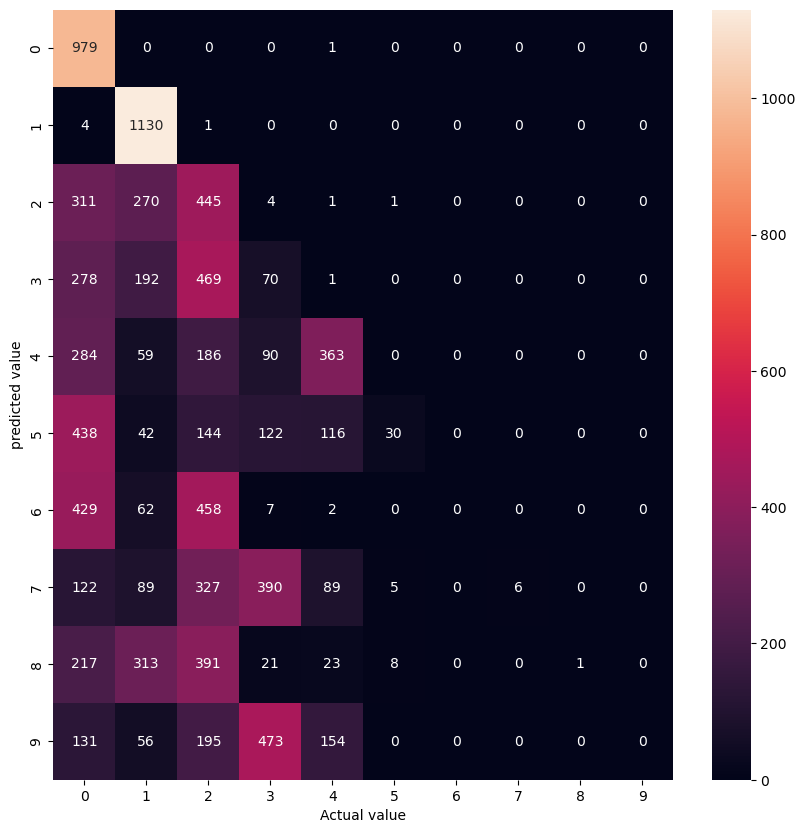

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Actual value')
plt.ylabel('predicted value')